# Scrape StackOverFlow using Python

#### Disclaimer: The library provided herein is intended solely for educational and research purposes. The use of this library for any illegal activity is strictly prohibited. The creators of this library do not condone or support any illegal activity or behavior, and shall not be held liable for any consequences that arise from the misuse of this library. It is the responsibility of the user to ensure that their use of this library complies with all applicable laws and regulations. By using this library, you acknowledge that you have read this disclaimer and agree to be bound by its terms and conditions.

### Import the Scrape class

In [1]:
from scrapeStackOverFlow.scrape import Scrape

### Initiate the object if the Scrape class

- startpage : int => From which page scrapping should start.
- endpage : int => On which page scrapping should end.
- tab : str => ''votes, 'frequent', 'unanswered', 'newest', 'bounties', 'active'.
- save_output : bool => True for saving the file, False for not saving.
- save_path : str | path => Path with filename to save the output as text file.
- print_result : bool => True to print the links scrapped and number of answers found. False will print nothing.

In [2]:
scraper = Scrape(startpage=1, endpage= 1, tab='votes', save_output=True)

### Call the scrape method of that scraper object

[{'question': 'Here is a piece of C++ code that shows some very peculiar behavior.For some reason, sorting the data (before the timed region) miraculously makes the primary loop almost six times faster:#include <algorithm>\n#include <ctime>\n#include <iostream>\n\nint main()\n{\n    // Generate data\n    const unsigned arraySize = 32768;\n    int data[arraySize];\n\n    for (unsigned c = 0; c < arraySize; ++c)\n        data[c] = std::rand() % 256;\n\n    // !!! With this, the next loop runs faster.\n    std::sort(data, data + arraySize);\n\n    // Test\n    clock_t start = clock();\n    long long sum = 0;\n    for (unsigned i = 0; i < 100000; ++i)\n    {\n        for (unsigned c = 0; c < arraySize; ++c)\n        {   // Primary loop.\n            if (data[c] >= 128)\n                sum += data[c];\n        }\n    }\n\n    double elapsedTime = static_cast<double>(clock()-start) / CLOCKS_PER_SEC;\n\n    std::cout << elapsedTime << \'\\n\';\n    std::cout << "sum = " << sum << \'\\n\';\n}
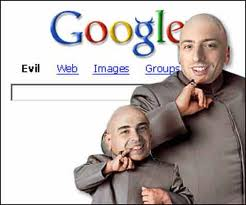

In [3]:
QnAs = scraper.scrape()
QnAs

### Sample answer copied from the returned output

In [9]:
Q = {'question': "What is the use of the yield keyword in Python? What does it do?yieldFor example, I'm trying to understand this code1:def _get_child_candidates(self, distance, min_dist, max_dist):\n    if self._leftchild and distance - max_dist < self._median:\n        yield self._leftchild\n    if self._rightchild and distance + max_dist >= self._median:\n        yield self._rightchild  \nAnd this is the caller:result, candidates = [], [self]\nwhile candidates:\n    node = candidates.pop()\n    distance = node._get_dist(obj)\n    if distance <= max_dist and distance >= min_dist:\n        result.extend(node._values)\n    candidates.extend(node._get_child_candidates(distance, min_dist, max_dist))\nreturn result\nWhat happens when the method _get_child_candidates is called?\nIs a list returned? A single element? Is it called again? When will subsequent calls stop?_get_child_candidatesModule mspace",
  'answers': ['To understand what yield does, you must understand what generators are. And before you can understand generators, you must understand iterables.yieldWhen you create a list, you can read its items one by one. Reading its items one by one is called iteration:>>> mylist = [1, 2, 3]\n>>> for i in mylist:\n...    print(i)\n1\n2\n3\nmylist is an iterable. When you use a list comprehension, you create a list, and so an iterable:mylist>>> mylist = [x*x for x in range(3)]\n>>> for i in mylist:\n...    print(i)\n0\n1\n4\nEverything you can use "for... in..." on is an iterable; lists, strings, files...for... in...listsstringsThese iterables are handy because you can read them as much as you wish, but you store all the values in memory and this is not always what you want when you have a lot of values.Generators are iterators, a kind of iterable you can only iterate over once. Generators do not store all the values in memory, they generate the values on the fly:>>> mygenerator = (x*x for x in range(3))\n>>> for i in mygenerator:\n...    print(i)\n0\n1\n4\nIt is just the same except you used () instead of []. BUT, you cannot perform for i in mygenerator a second time since generators can only be used once: they calculate 0, then forget about it and calculate 1, and end calculating 4, one by one.()[]for i in mygeneratoryield is a keyword that is used like return, except the function will return a generator.yieldreturn>>> def create_generator():\n...    mylist = range(3)\n...    for i in mylist:\n...        yield i*i\n...\n>>> mygenerator = create_generator() # create a generator\n>>> print(mygenerator) # mygenerator is an object!\n<generator object create_generator at 0xb7555c34>\n>>> for i in mygenerator:\n...     print(i)\n0\n1\n4\nHere it\'s a useless example, but it\'s handy when you know your function will return a huge set of values that you will only need to read once.To master yield, you must understand that when you call the function, the code you have written in the function body does not run. The function only returns the generator object, this is a bit tricky.yieldThen, your code will continue from where it left off each time for uses the generator.forNow the hard part:The first time the for calls the generator object created from your function, it will run the code in your function from the beginning until it hits yield, then it\'ll return the first value of the loop. Then, each subsequent call will run another iteration of the loop you have written in the function and return the next value. This will continue until the generator is considered empty, which happens when the function runs without hitting yield. That can be because the loop has come to an end, or because you no longer satisfy an "if/else".foryieldyield"if/else"Generator:# Here you create the method of the node object that will return the generator\ndef _get_child_candidates(self, distance, min_dist, max_dist):\n\n    # Here is the code that will be called each time you use the generator object:\n\n    # If there is still a child of the node object on its left\n    # AND if the distance is ok, return the next child\n    if self._leftchild and distance - max_dist < self._median:\n        yield self._leftchild\n\n    # If there is still a child of the node object on its right\n    # AND if the distance is ok, return the next child\n    if self._rightchild and distance + max_dist >= self._median:\n        yield self._rightchild\n\n    # If the function arrives here, the generator will be considered empty\n    # there are no more than two values: the left and the right children\nCaller:# Create an empty list and a list with the current object reference\nresult, candidates = list(), [self]\n\n# Loop on candidates (they contain only one element at the beginning)\nwhile candidates:\n\n    # Get the last candidate and remove it from the list\n    node = candidates.pop()\n\n    # Get the distance between obj and the candidate\n    distance = node._get_dist(obj)\n\n    # If the distance is ok, then you can fill in the result\n    if distance <= max_dist and distance >= min_dist:\n        result.extend(node._values)\n\n    # Add the children of the candidate to the candidate\'s list\n    # so the loop will keep running until it has looked\n    # at all the children of the children of the children, etc. of the candidate\n    candidates.extend(node._get_child_candidates(distance, min_dist, max_dist))\n\nreturn result\nThis code contains several smart parts:The loop iterates on a list, but the list expands while the loop is being iterated. It\'s a concise way to go through all these nested data even if it\'s a bit dangerous since you can end up with an infinite loop. In this case, candidates.extend(node._get_child_candidates(distance, min_dist, max_dist)) exhausts all the values of the generator, but while keeps creating new generator objects which will produce different values from the previous ones since it\'s not applied on the same node.candidates.extend(node._get_child_candidates(distance, min_dist, max_dist))whileThe extend() method is a list object method that expects an iterable and adds its values to the list.extend()Usually, we pass a list to it:>>> a = [1, 2]\n>>> b = [3, 4]\n>>> a.extend(b)\n>>> print(a)\n[1, 2, 3, 4]\nBut in your code, it gets a generator, which is good because:And it works because Python does not care if the argument of a method is a list or not. Python expects iterables so it will work with strings, lists, tuples, and generators! This is called duck typing and is one of the reasons why Python is so cool. But this is another story, for another question...You can stop here, or read a little bit to see an advanced use of a generator:>>> class Bank(): # Let\'s create a bank, building ATMs\n...    crisis = False\n...    def create_atm(self):\n...        while not self.crisis:\n...            yield "$100"\n>>> hsbc = Bank() # When everything\'s ok the ATM gives you as much as you want\n>>> corner_street_atm = hsbc.create_atm()\n>>> print(corner_street_atm.next())\n$100\n>>> print(corner_street_atm.next())\n$100\n>>> print([corner_street_atm.next() for cash in range(5)])\n[\'$100\', \'$100\', \'$100\', \'$100\', \'$100\']\n>>> hsbc.crisis = True # Crisis is coming, no more money!\n>>> print(corner_street_atm.next())\n<type \'exceptions.StopIteration\'>\n>>> wall_street_atm = hsbc.create_atm() # It\'s even true for new ATMs\n>>> print(wall_street_atm.next())\n<type \'exceptions.StopIteration\'>\n>>> hsbc.crisis = False # The trouble is, even post-crisis the ATM remains empty\n>>> print(corner_street_atm.next())\n<type \'exceptions.StopIteration\'>\n>>> brand_new_atm = hsbc.create_atm() # Build a new one to get back in business\n>>> for cash in brand_new_atm:\n...    print cash\n$100\n$100\n$100\n$100\n$100\n$100\n$100\n$100\n$100\n...\nNote: For Python 3, useprint(corner_street_atm.__next__()) or print(next(corner_street_atm))print(corner_street_atm.__next__())print(next(corner_street_atm))It can be useful for various things like controlling access to a resource.The itertools module contains special functions to manipulate iterables. Ever wish to duplicate a generator?\nChain two generators? Group values in a nested list with a one-liner? Map / Zip without creating another list?Map / ZipThen just import itertools.import itertoolsAn example? Let\'s see the possible orders of arrival for a four-horse race:>>> horses = [1, 2, 3, 4]\n>>> races = itertools.permutations(horses)\n>>> print(races)\n<itertools.permutations object at 0xb754f1dc>\n>>> print(list(itertools.permutations(horses)))\n[(1, 2, 3, 4),\n (1, 2, 4, 3),\n (1, 3, 2, 4),\n (1, 3, 4, 2),\n (1, 4, 2, 3),\n (1, 4, 3, 2),\n (2, 1, 3, 4),\n (2, 1, 4, 3),\n (2, 3, 1, 4),\n (2, 3, 4, 1),\n (2, 4, 1, 3),\n (2, 4, 3, 1),\n (3, 1, 2, 4),\n (3, 1, 4, 2),\n (3, 2, 1, 4),\n (3, 2, 4, 1),\n (3, 4, 1, 2),\n (3, 4, 2, 1),\n (4, 1, 2, 3),\n (4, 1, 3, 2),\n (4, 2, 1, 3),\n (4, 2, 3, 1),\n (4, 3, 1, 2),\n (4, 3, 2, 1)]\nIteration is a process implying iterables (implementing the __iter__() method) and iterators (implementing the __next__() method).\nIterables are any objects you can get an iterator from. Iterators are objects that let you iterate on iterables.__iter__()__next__()There is more about it in this article about how for loops work.how for loops workfor',
   "yieldWhen you see a function with yield statements, apply this easy trick to understand what will happen:yieldresult = []yield exprresult.append(expr)return resultyieldThis trick may give you an idea of the logic behind the function, but what actually happens with yield is significantly different than what happens in the list-based approach. In many cases, the yield approach will be a lot more memory efficient and faster too. In other cases, this trick will get you stuck in an infinite loop, even though the original function works just fine. Read on to learn more...yieldFirst, the iterator protocol - when you writefor x in mylist:\n    ...loop body...\nPython performs the following two steps:Gets an iterator for mylist:mylistCall iter(mylist) -> this returns an object with a next() method (or __next__() in Python 3).iter(mylist)next()__next__()[This is the step most people forget to tell you about]Uses the iterator to loop over items:Keep calling the next() method on the iterator returned from step 1. The return value from next() is assigned to x and the loop body is executed. If an exception StopIteration is raised from within next(), it means there are no more values in the iterator and the loop is exited.next()next()xStopIterationnext()The truth is Python performs the above two steps anytime it wants to loop over the contents of an object - so it could be a for loop, but it could also be code like otherlist.extend(mylist) (where otherlist is a Python list).otherlist.extend(mylist)otherlistHere mylist is an iterable because it implements the iterator protocol. In a user-defined class, you can implement the __iter__() method to make instances of your class iterable. This method should return an iterator. An iterator is an object with a next() method. It is possible to implement both __iter__() and next() on the same class, and have __iter__() return self. This will work for simple cases, but not when you want two iterators looping over the same object at the same time.mylist__iter__()next()__iter__()next()__iter__()selfSo that's the iterator protocol, many objects implement this protocol:__iter__()Note that a for loop doesn't know what kind of object it's dealing with - it just follows the iterator protocol, and is happy to get item after item as it calls next(). Built-in lists return their items one by one, dictionaries return the keys one by one, files return the lines one by one, etc. And generators return... well that's where yield comes in:fornext()yielddef f123():\n    yield 1\n    yield 2\n    yield 3\n\nfor item in f123():\n    print item\nInstead of yield statements, if you had three return statements in f123() only the first would get executed, and the function would exit. But f123() is no ordinary function. When f123() is called, it does not return any of the values in the yield statements! It returns a generator object. Also, the function does not really exit - it goes into a suspended state. When the for loop tries to loop over the generator object, the function resumes from its suspended state at the very next line after the yield it previously returned from, executes the next line of code, in this case, a yield statement, and returns that as the next item. This happens until the function exits, at which point the generator raises StopIteration, and the loop exits.yieldreturnf123()f123()f123()foryieldyieldStopIterationSo the generator object is sort of like an adapter - at one end it exhibits the iterator protocol, by exposing __iter__() and next() methods to keep the for loop happy. At the other end, however, it runs the function just enough to get the next value out of it, and puts it back in suspended mode.__iter__()next()forUsually, you can write code that doesn't use generators but implements the same logic. One option is to use the temporary list 'trick' I mentioned before. That will not work in all cases, for e.g. if you have infinite loops, or it may make inefficient use of memory when you have a really long list. The other approach is to implement a new iterable class SomethingIter that keeps the state in instance members and performs the next logical step in its next() (or __next__() in Python 3) method. Depending on the logic, the code inside the next() method may end up looking very complex and prone to bugs. Here generators provide a clean and easy solution.next()__next__()next()",
   "Think of it this way:An iterator is just a fancy sounding term for an object that has a next() method.  So a yield-ed function ends up being something like this:next()Original version:def some_function():\n    for i in xrange(4):\n        yield i\n\nfor i in some_function():\n    print i\nThis is basically what the Python interpreter does with the above code:class it:\n    def __init__(self):\n        # Start at -1 so that we get 0 when we add 1 below.\n        self.count = -1\n\n    # The __iter__ method will be called once by the 'for' loop.\n    # The rest of the magic happens on the object returned by this method.\n    # In this case it is the object itself.\n    def __iter__(self):\n        return self\n\n    # The next method will be called repeatedly by the 'for' loop\n    # until it raises StopIteration.\n    def next(self):\n        self.count += 1\n        if self.count < 4:\n            return self.count\n        else:\n            # A StopIteration exception is raised\n            # to signal that the iterator is done.\n            # This is caught implicitly by the 'for' loop.\n            raise StopIteration\n\ndef some_func():\n    return it()\n\nfor i in some_func():\n    print i\nFor more insight as to what's happening behind the scenes, the for loop can be rewritten to this:foriterator = some_func()\ntry:\n    while 1:\n        print iterator.next()\nexcept StopIteration:\n    pass\nDoes that make more sense or just confuse you more?  :)I should note that this is an oversimplification for illustrative purposes. :)",
   'The yield keyword is reduced to two simple facts:yieldyieldreturnlistsetrangeIn a nutshell: Most commonly, a generator is a lazy, incrementally-pending list, and yield statements allow you to use function notation to program the list values the generator should incrementally spit out. Furthermore, advanced usage lets you use generators as coroutines (see below).yieldgenerator = myYieldingFunction(...)  # basically a list (but lazy)\nx = list(generator)  # evaluate every element into a list\n\n   generator\n       v\n[x[0], ..., ???]\n\n         generator\n             v\n[x[0], x[1], ..., ???]\n\n               generator\n                   v\n[x[0], x[1], x[2], ..., ???]\n\n                       StopIteration exception\n[x[0], x[1], x[2]]     done\nBasically, whenever the yield statement is encountered, the function pauses and saves its state, then emits "the next return value in the \'list\'" according to the python iterator protocol (to some syntactic construct like a for-loop that repeatedly calls next() and catches a StopIteration exception, etc.). You might have encountered generators with generator expressions; generator functions are more powerful because you can pass arguments back into the paused generator function, using them to implement coroutines. More on that later.yieldnext()StopIterationgenerator expressionsLet\'s define a function makeRange that\'s just like Python\'s range. Calling makeRange(n) RETURNS A GENERATOR:makeRangerangemakeRange(n)def makeRange(n):\n    # return 0,1,2,...,n-1\n    i = 0\n    while i < n:\n        yield i\n        i += 1\n\n>>> makeRange(5)\n<generator object makeRange at 0x19e4aa0>\nTo force the generator to immediately return its pending values, you can pass it into list() (just like you could any iterable):list()>>> list(makeRange(5))\n[0, 1, 2, 3, 4]\nThe above example can be thought of as merely creating a list which you append to and return:# return a list                  #  # return a generator\ndef makeRange(n):                #  def makeRange(n):\n    """return [0,1,2,...,n-1]""" #      """return 0,1,2,...,n-1"""\n    TO_RETURN = []               # \n    i = 0                        #      i = 0\n    while i < n:                 #      while i < n:\n        TO_RETURN += [i]         #          yield i\n        i += 1                   #          i += 1\n    return TO_RETURN             # \n\n>>> makeRange(5)\n[0, 1, 2, 3, 4]\nThere is one major difference, though; see the last section.An iterable is the last part of a list comprehension, and all generators are iterable, so they\'re often used like so:#                  < ITERABLE >\n>>> [x+10 for x in makeRange(5)]\n[10, 11, 12, 13, 14]\nTo get a better feel for generators, you can play around with the itertools module (be sure to use chain.from_iterable rather than chain when warranted). For example, you might even use generators to implement infinitely-long lazy lists like itertools.count(). You could implement your own def enumerate(iterable): zip(count(), iterable), or alternatively do so with the yield keyword in a while-loop.itertoolschain.from_iterablechainitertools.count()def enumerate(iterable): zip(count(), iterable)yieldPlease note: generators can actually be used for many more things, such as implementing coroutines or non-deterministic programming or other elegant things. However, the "lazy lists" viewpoint I present here is the most common use you will find.implementing coroutinesThis is how the "Python iteration protocol" works. That is, what is going on when you do list(makeRange(5)). This is what I describe earlier as a "lazy, incremental list".list(makeRange(5))>>> x=iter(range(5))\n>>> next(x)  # calls x.__next__(); x.next() is deprecated\n0\n>>> next(x)\n1\n>>> next(x)\n2\n>>> next(x)\n3\n>>> next(x)\n4\n>>> next(x)\nTraceback (most recent call last):\n  File "<stdin>", line 1, in <module>\nStopIteration\nThe built-in function next() just calls the objects .__next__() function, which is a part of the "iteration protocol" and is found on all iterators. You can manually use the next() function (and other parts of the iteration protocol) to implement fancy things, usually at the expense of readability, so try to avoid doing that...next().__next__()next()Coroutine example:Coroutinedef interactiveProcedure():\n    userResponse = yield makeQuestionWebpage()\n    print(\'user response:\', userResponse)\n    yield \'success\'\n\ncoroutine = interactiveProcedure()\nwebFormData = next(coroutine)  # same as .send(None)\nuserResponse = serveWebForm(webFormData)\n\n# ...at some point later on web form submit...\n\nsuccessStatus = coroutine.send(userResponse)\nA coroutine (generators which generally accept input via the yield keyword e.g. nextInput = yield nextOutput, as a form of two-way communication) is basically a computation which is allowed to pause itself and request input (e.g. to what it should do next). When the coroutine pauses itself (when the running coroutine eventually hits a yield keyword), the computation is paused and control is inverted (yielded) back to the \'calling\' function (the frame which requested the next value of the computation). The paused generator/coroutine remains paused until another invoking function (possibly a different function/context) requests the next value to unpause it (usually passing input data to direct the paused logic interior to the coroutine\'s code).yieldnextInput = yield nextOutputyieldnextYou can think of python coroutines as lazy incrementally-pending lists, where the next element doesn\'t just depend on the previous computation, but also on input you may opt to inject during the generation process.Normally, most people would not care about the following distinctions and probably want to stop reading here.In Python-speak, an iterable is any object which "understands the concept of a for-loop" like a list [1,2,3], and an iterator is a specific instance of the requested for-loop like [1,2,3].__iter__(). A generator is exactly the same as any iterator, except for the way it was written (with function syntax).[1,2,3][1,2,3].__iter__()When you request an iterator from a list, it creates a new iterator. However, when you request an iterator from an iterator (which you would rarely do), it just gives you a copy of itself.Thus, in the unlikely event that you are failing to do something like this...> x = myRange(5)\n> list(x)\n[0, 1, 2, 3, 4]\n> list(x)\n[]\n... then remember that a generator is an iterator; that is, it is one-time-use. If you want to reuse it, you should call myRange(...) again. If you need to use the result twice, convert the result to a list and store it in a variable x = list(myRange(5)). Those who absolutely need to clone a generator (for example, who are doing terrifyingly hackish metaprogramming) can use itertools.tee (still works in Python 3) if absolutely necessary, since the copyable iterator Python PEP standards proposal has been deferred.myRange(...)x = list(myRange(5))itertools.teeitertools.teestill works in Python 3copyable iterator Python PEP standards proposal',
   'What does the yield keyword do in Python?yieldyieldyieldGeneratoriterator protocolyield fromreturnyield is only legal inside of a function definition, and the inclusion of yield in a function definition makes it return a generator.yieldyieldThe idea for generators comes from other languages (see footnote 1) with varying implementations. In Python\'s Generators, the execution of the code is frozen at the point of the yield. When the generator is called (methods are discussed below) execution resumes and then freezes at the next yield.frozenyield provides an\neasy way of implementing the iterator protocol, defined by the following two methods:\n__iter__ and __next__.  Both of those methods\nmake an object an iterator that you could type-check with the Iterator Abstract Base\nClass from the collections module.yieldimplementing the iterator protocol__iter____next__Iteratorcollectionsdef func():\n    yield \'I am\'\n    yield \'a generator!\'\nLet\'s do some introspection:>>> type(func)                 # A function with yield is still a function\n<type \'function\'>\n>>> gen = func()\n>>> type(gen)                  # but it returns a generator\n<type \'generator\'>\n>>> hasattr(gen, \'__iter__\')   # that\'s an iterable\nTrue\n>>> hasattr(gen, \'__next__\')   # and with .__next__\nTrue                           # implements the iterator protocol.\nThe generator type is a sub-type of iterator:from types import GeneratorType\nfrom collections.abc import Iterator\n\n>>> issubclass(GeneratorType, Iterator)\nTrue\nAnd if necessary, we can type-check like this:>>> isinstance(gen, GeneratorType)\nTrue\n>>> isinstance(gen, Iterator)\nTrue\nA feature of an Iterator is that once exhausted, you can\'t reuse or reset it:Iteratoris that once exhausted>>> list(gen)\n[\'I am\', \'a generator!\']\n>>> list(gen)\n[]\nYou\'ll have to make another if you want to use its functionality again (see footnote 2):>>> list(func())\n[\'I am\', \'a generator!\']\nOne can yield data programmatically, for example:def func(an_iterable):\n    for item in an_iterable:\n        yield item\nThe above simple generator is also equivalent to the below - as of Python 3.3 you can use yield from:yield fromyield fromdef func(an_iterable):\n    yield from an_iterable\nHowever, yield from also allows for delegation to subgenerators,\nwhich will be explained in the following section on cooperative delegation with sub-coroutines.yield fromyield forms an expression that allows data to be sent into the generator (see footnote 3)yieldHere is an example, take note of the received variable, which will point to the data that is sent to the generator:receiveddef bank_account(deposited, interest_rate):\n    while True:\n        calculated_interest = interest_rate * deposited \n        received = yield calculated_interest\n        if received:\n            deposited += received\n\n\n>>> my_account = bank_account(1000, .05)\nFirst, we must queue up the generator with the builtin function, next. It will\ncall the appropriate next or __next__ method, depending on the version of\nPython you are using:nextnextnext__next__>>> first_year_interest = next(my_account)\n>>> first_year_interest\n50.0\nAnd now we can send data into the generator. (Sending None is\nthe same as calling next.) :Sending None is\nthe same as calling nextNonenext>>> next_year_interest = my_account.send(first_year_interest + 1000)\n>>> next_year_interest\n102.5\nyield fromNow, recall that yield from is available in Python 3. This allows us to delegate coroutines to a subcoroutine:yield from\ndef money_manager(expected_rate):\n    # must receive deposited value from .send():\n    under_management = yield                   # yield None to start.\n    while True:\n        try:\n            additional_investment = yield expected_rate * under_management \n            if additional_investment:\n                under_management += additional_investment\n        except GeneratorExit:\n            \'\'\'TODO: write function to send unclaimed funds to state\'\'\'\n            raise\n        finally:\n            \'\'\'TODO: write function to mail tax info to client\'\'\'\n        \n\ndef investment_account(deposited, manager):\n    \'\'\'very simple model of an investment account that delegates to a manager\'\'\'\n    # must queue up manager:\n    next(manager)      # <- same as manager.send(None)\n    # This is where we send the initial deposit to the manager:\n    manager.send(deposited)\n    try:\n        yield from manager\n    except GeneratorExit:\n        return manager.close()  # delegate?\nAnd now we can delegate functionality to a sub-generator and it can be used\nby a generator just as above:my_manager = money_manager(.06)\nmy_account = investment_account(1000, my_manager)\nfirst_year_return = next(my_account) # -> 60.0\nNow simulate adding another 1,000 to the account plus the return on the account (60.0):next_year_return = my_account.send(first_year_return + 1000)\nnext_year_return # 123.6\nYou can read more about the precise semantics of yield from in PEP 380.yield fromPEP 380.The close method raises GeneratorExit at the point the function\nexecution was frozen. This will also be called by __del__ so you\ncan put any cleanup code where you handle the GeneratorExit:closeGeneratorExit__del__GeneratorExitmy_account.close()\nYou can also throw an exception which can be handled in the generator\nor propagated back to the user:import sys\ntry:\n    raise ValueError\nexcept:\n    my_manager.throw(*sys.exc_info())\nRaises:Traceback (most recent call last):\n  File "<stdin>", line 4, in <module>\n  File "<stdin>", line 6, in money_manager\n  File "<stdin>", line 2, in <module>\nValueError\nI believe I have covered all aspects of the following question:What does the yield keyword do in Python?yieldIt turns out that yield does a lot. I\'m sure I could add even more\nthorough examples to this. If you want more or have some constructive criticism, let me know by commenting\nbelow.yield__iter__.__next__forStopIterationStopIterationyield.nextnextnext(obj)yieldyieldyield fromThe top/accepted answer is a very incomplete answer.yieldThe grammar currently allows any expression in a list comprehension.expr_stmt: testlist_star_expr (annassign | augassign (yield_expr|testlist) |\n                     (\'=\' (yield_expr|testlist_star_expr))*)\n...\nyield_expr: \'yield\' [yield_arg]\nyield_arg: \'from\' test | testlist\nSince yield is an expression, it has been touted by some as interesting to use it in comprehensions or generator expression - in spite of citing no particularly good use-case.The CPython core developers are discussing deprecating its allowance.\nHere\'s a relevant post from the mailing list:discussing deprecating its allowanceOn 30 January 2017 at 19:05, Brett Cannon  wrote:On Sun, 29 Jan 2017 at 16:39 Craig Rodrigues  wrote:I\'m OK with either approach.  Leaving things the way they are in Python 3\nis no good, IMHO.My vote is it be a SyntaxError since you\'re not getting what you expect from\nthe syntax.I\'d agree that\'s a sensible place for us to end up, as any code\nrelying on the current behaviour is really too clever to be\nmaintainable.In terms of getting there, we\'ll likely want:Cheers, Nick.--  Nick Coghlan   |   ncoghlan at gmail.com   |   Brisbane, AustraliaFurther, there is an outstanding issue (10544) which seems to be pointing in the direction of this never being a good idea (PyPy, a Python implementation written in Python, is already raising syntax warnings.)outstanding issue (10544)Bottom line, until the developers of CPython tell us otherwise: Don\'t put yield in a generator expression or comprehension.yieldreturnIn Python 3:Python 3In a generator function, the return statement indicates that the generator is done and will cause StopIteration to be raised. The returned value (if any) is used as an argument to construct StopIteration and becomes the StopIteration.value attribute.returnStopIterationStopIterationStopIteration.valueHistorical note, in Python 2:\n"In a generator function, the return statement is not allowed to include an expression_list. In that context, a bare return indicates that the generator is done and will cause StopIteration to be raised."\nAn expression_list is basically any number of expressions separated by commas - essentially, in Python 2, you can stop the generator with return, but you can\'t return a value.\nPython 2returnexpression_listreturnStopIterationexpression_listreturnThe languages CLU, Sather, and Icon were referenced in the proposal\nto introduce the concept of generators to Python. The general idea is\nthat a function can maintain internal state and yield intermediate\ndata points on demand by the user. This promised to be superior in performance\nto other approaches, including Python threading, which isn\'t even available on some systems.superior in performance\nto other approaches, including Python threading This means, for example, that range objects aren\'t Iterators, even though they are iterable, because they can be reused. Like lists, their __iter__ methods return iterator objects.rangeIterator__iter__ yield was originally introduced as a statement, meaning that it\ncould only appear at the beginning of a line in a code block.\nNow yield creates a yield expression.\nhttps://docs.python.org/2/reference/simple_stmts.html#grammar-token-yield_stmt\nThis change was proposed to allow a user to send data into the generator just as\none might receive it. To send data, one must be able to assign it to something, and\nfor that, a statement just won\'t work.yieldyieldhttps://docs.python.org/2/reference/simple_stmts.html#grammar-token-yield_stmtproposed',
   "yield is just like return - it returns whatever you tell it to (as a generator). The difference is that the next time you call the generator, execution starts from the last call to the yield statement. Unlike return, the stack frame is not cleaned up when a yield occurs, however control is transferred back to the caller, so its state will resume the next time the function is called.yieldreturnyieldIn the case of your code, the function get_child_candidates is acting like an iterator so that when you extend your list, it adds one element at a time to the new list.get_child_candidateslist.extend calls an iterator until it's exhausted. In the case of the code sample you posted, it would be much clearer to just return a tuple and append that to the list.list.extend",
   "There's one extra thing to mention: a function that yields doesn't actually have to terminate. I've written code like this:def fib():\n    last, cur = 0, 1\n    while True: \n        yield cur\n        last, cur = cur, last + cur\nThen I can use it in other code like this:for f in fib():\n    if some_condition: break\n    coolfuncs(f);\nIt really helps simplify some problems, and makes some things easier to work with. ",
   'For those who prefer a minimal working example, meditate on this interactive Python session:>>> def f():\n...   yield 1\n...   yield 2\n...   yield 3\n... \n>>> g = f()\n>>> for i in g:\n...   print(i)\n... \n1\n2\n3\n>>> for i in g:\n...   print(i)\n... \n>>> # Note that this time nothing was printed\n',
   'TL;DRdef square_list(n):\n    the_list = []                         # Replace\n    for x in range(n):\n        y = x * x\n        the_list.append(y)                # these\n    return the_list                       # lines\ndef square_yield(n):\n    for x in range(n):\n        y = x * x\n        yield y                           # with this one.\nWhenever you find yourself building a list from scratch, yield each piece instead. yieldThis was my first "aha" moment with yield.yield is a sugary way to say yieldsugarybuild a series of stuffSame behavior:>>> for square in square_list(4):\n...     print(square)\n...\n0\n1\n4\n9\n>>> for square in square_yield(4):\n...     print(square)\n...\n0\n1\n4\n9\nDifferent behavior:Yield is single-pass: you can only iterate through once. When a function has a yield in it we call it a generator function. And an iterator is what it returns. Those terms are revealing. We lose the convenience of a container, but gain the power of a series that\'s computed as needed, and arbitrarily long.generator functioniteratorYield is lazy, it puts off computation. A function with a yield in it doesn\'t actually execute at all when you call it. It returns an iterator object that remembers where it left off. Each time you call next() on the iterator (this happens in a for-loop) execution inches forward to the next yield. return raises StopIteration and ends the series (this is the natural end of a for-loop).iterator objectnext()returnYield is versatile. Data doesn\'t have to be stored all together, it can be made available one at a time. It can be infinite.>>> def squares_all_of_them():\n...     x = 0\n...     while True:\n...         yield x * x\n...         x += 1\n...\n>>> squares = squares_all_of_them()\n>>> for _ in range(4):\n...     print(next(squares))\n...\n0\n1\n4\n9\nIf you need multiple passes and the series isn\'t too long, just call list() on it:list()>>> list(square_yield(4))\n[0, 1, 4, 9]\nBrilliant choice of the word yield because both meanings apply:yieldboth meaningsyield — produce or provide (as in agriculture)...provide the next data in the series.yield — give way or relinquish (as in political power)...relinquish CPU execution until the iterator advances.',
   'Yield gives you a generator. def get_odd_numbers(i):\n    return range(1, i, 2)\ndef yield_odd_numbers(i):\n    for x in range(1, i, 2):\n       yield x\nfoo = get_odd_numbers(10)\nbar = yield_odd_numbers(10)\nfoo\n[1, 3, 5, 7, 9]\nbar\n<generator object yield_odd_numbers at 0x1029c6f50>\nbar.next()\n1\nbar.next()\n3\nbar.next()\n5\nAs you can see, in the first case foo holds the entire list in memory at once. It\'s not a big deal for a list with 5 elements, but what if you want a list of 5 million? Not only is this a huge memory eater, it also costs a lot of time to build at the time that the function is called.fooIn the second case, bar just gives you a generator. A generator is an iterable--which means you can use it in a for loop, etc, but each value can only be accessed once. All the values are also not stored in memory at the same time; the generator object "remembers" where it was in the looping the last time you called it--this way, if you\'re using an iterable to (say) count to 50 billion, you don\'t have to count to 50 billion all at once and store the 50 billion numbers to count through.barforAgain, this is a pretty contrived example, you probably would use itertools if you really wanted to count to 50 billion. :)This is the most simple use case of generators. As you said, it can be used to write efficient permutations, using yield to push things up through the call stack instead of using some sort of stack variable. Generators can also be used for specialized tree traversal, and all manner of other things.',
   'It\'s returning a generator. I\'m not particularly familiar with Python, but I believe it\'s the same kind of thing as C#\'s iterator blocks if you\'re familiar with those.C#\'s iterator blocksThe key idea is that the compiler/interpreter/whatever does some trickery so that as far as the caller is concerned, they can keep calling next() and it will keep returning values - as if the generator method was paused. Now obviously you can\'t really "pause" a method, so the compiler builds a state machine for you to remember where you currently are and what the local variables etc look like. This is much easier than writing an iterator yourself.',
   "There is one type of answer that I don't feel has been given yet, among the many great answers that describe how to use generators. Here is the programming language theory answer:The yield statement in Python returns a generator. A generator in Python is a function that returns continuations (and specifically a type of coroutine, but continuations represent the more general mechanism to understand what is going on).yieldContinuations in programming languages theory are a much more fundamental kind of computation, but they are not often used, because they are extremely hard to reason about and also very difficult to implement. But the idea of what a continuation is, is straightforward: it is the state of a computation that has not yet finished. In this state, the current values of variables, the operations that have yet to be performed, and so on, are saved. Then at some point later in the program the continuation can be invoked, such that the program's variables are reset to that state and the operations that were saved are carried out.Continuations, in this more general form, can be implemented in two ways. In the call/cc way, the program's stack is literally saved and then when the continuation is invoked, the stack is restored.call/ccIn continuation passing style (CPS), continuations are just normal functions (only in languages where functions are first class) which the programmer explicitly manages and passes around to subroutines. In this style, program state is represented by closures (and the variables that happen to be encoded in them) rather than variables that reside somewhere on the stack. Functions that manage control flow accept continuation as arguments (in some variations of CPS, functions may accept multiple continuations) and manipulate control flow by invoking them by simply calling them and returning afterwards. A very simple example of continuation passing style is as follows:def save_file(filename):\n  def write_file_continuation():\n    write_stuff_to_file(filename)\n\n  check_if_file_exists_and_user_wants_to_overwrite(write_file_continuation)\nIn this (very simplistic) example, the programmer saves the operation of actually writing the file into a continuation (which can potentially be a very complex operation with many details to write out), and then passes that continuation (i.e, as a first-class closure) to another operator which does some more processing, and then calls it if necessary. (I use this design pattern a lot in actual GUI programming, either because it saves me lines of code or, more importantly, to manage control flow after GUI events trigger.)The rest of this post will, without loss of generality, conceptualize continuations as CPS, because it is a hell of a lot easier to understand and read.Now let's talk about generators in Python. Generators are a specific subtype of continuation. Whereas continuations are able in general to save the state of a computation (i.e., the program's call stack), generators are only able to save the state of iteration over an iterator. Although, this definition is slightly misleading for certain use cases of generators. For instance:def f():\n  while True:\n    yield 4\nThis is clearly a reasonable iterable whose behavior is well defined -- each time the generator iterates over it, it returns 4 (and does so forever). But it isn't probably the prototypical type of iterable that comes to mind when thinking of iterators (i.e., for x in collection: do_something(x)). This example illustrates the power of generators: if anything is an iterator, a generator can save the state of its iteration.for x in collection: do_something(x)To reiterate: Continuations can save the state of a program's stack and generators can save the state of iteration. This means that continuations are more a lot powerful than generators, but also that generators are a lot, lot easier. They are easier for the language designer to implement, and they are easier for the programmer to use (if you have some time to burn, try to read and understand this page about continuations and call/cc).this page about continuations and call/ccBut you could easily implement (and conceptualize) generators as a simple, specific case of continuation passing style:Whenever yield is called, it tells the function to return a continuation.  When the function is called again, it starts from wherever it left off. So, in pseudo-pseudocode (i.e., not pseudocode, but not code) the generator's next method is basically as follows:yieldnextclass Generator():\n  def __init__(self,iterable,generatorfun):\n    self.next_continuation = lambda:generatorfun(iterable)\n\n  def next(self):\n    value, next_continuation = self.next_continuation()\n    self.next_continuation = next_continuation\n    return value\nwhere the yield keyword is actually syntactic sugar for the real generator function, basically something like:yielddef generatorfun(iterable):\n  if len(iterable) == 0:\n    raise StopIteration\n  else:\n    return (iterable[0], lambda:generatorfun(iterable[1:]))\nRemember that this is just pseudocode and the actual implementation of generators in Python is more complex. But as an exercise to understand what is going on, try to use continuation passing style to implement generator objects without use of the yield keyword.yield",
   "Here is an example in plain language. I will provide a correspondence between high-level human concepts to low-level Python concepts.I want to operate on a sequence of numbers, but I don't want to bother my self with the creation of that sequence, I want only to focus on the operation I want to do. So, I do the following:defyieldnext(generator).next.__next__next()len().__len__StopIterationreturnThis is what a generator does (a function that contains a yield); it starts executing on the first next(), pauses whenever it does a yield, and when asked for the next() value it continues from the point it was last. It fits perfectly by design with the iterator protocol of Python, which describes how to sequentially request values.yieldnext()yieldnext()The most famous user of the iterator protocol is the for command in Python. So, whenever you do a:forfor item in sequence:\nit doesn't matter if sequence is a list, a string, a dictionary or a generator object like described above; the result is the same: you read items off a sequence one by one.sequenceNote that defining a function which contains a yield keyword is not the only way to create a generator; it's just the easiest way to create one.defyieldFor more accurate information, read about iterator types, the yield statement and generators in the Python documentation.iterator typesyield statementgenerators",
   'While a lot of answers show why you\'d use a yield to create a generator, there are more uses for yield.  It\'s quite easy to make a coroutine, which enables the passing of information between two blocks of code.  I won\'t repeat any of the fine examples that have already been given about using yield to create a generator.yieldyieldyieldTo help understand what a yield does in the following code, you can use your finger to trace the cycle through any code that has a yield.  Every time your finger hits the yield, you have to wait for a next or a send to be entered.  When a next is called, you trace through the code until you hit the yield… the code on the right of the yield is evaluated and returned to the caller… then you wait.  When next is called again, you perform another loop through the code.  However, you\'ll note that in a coroutine, yield can also be used with a send… which will send a value from the caller into the yielding function. If a send is given, then yield receives the value sent, and spits it out the left hand side… then the trace through the code progresses until you hit the yield again (returning the value at the end, as if next was called).yieldyieldyieldnextsendnextyieldyieldnextyieldsendsendyieldyieldnextFor example:>>> def coroutine():\n...     i = -1\n...     while True:\n...         i += 1\n...         val = (yield i)\n...         print("Received %s" % val)\n...\n>>> sequence = coroutine()\n>>> sequence.next()\n0\n>>> sequence.next()\nReceived None\n1\n>>> sequence.send(\'hello\')\nReceived hello\n2\n>>> sequence.close()\n',
   "There is another yield use and meaning (since Python 3.3):yieldyield from <expr>\nFrom PEP 380 -- Syntax for Delegating to a Subgenerator:PEP 380 -- Syntax for Delegating to a SubgeneratorA syntax is proposed for a generator to delegate part of its operations to another generator. This allows a section of code containing 'yield' to be factored out and placed in another generator. Additionally, the subgenerator is allowed to return with a value, and the value is made available to the delegating generator.The new syntax also opens up some opportunities for optimisation when one generator re-yields values produced by another.Moreover this will introduce (since Python 3.5):thisasync def new_coroutine(data):\n   ...\n   await blocking_action()\nto avoid coroutines being confused with a regular generator (today yield is used in both).yield",
   "All great answers, however a bit difficult for newbies.I assume you have learned the return statement.returnAs an analogy, return and yield are twins. return means 'return and stop' whereas 'yield` means 'return, but continue'returnyieldreturnreturndef num_list(n):\n    for i in range(n):\n        return i\nRun it:In [5]: num_list(3)\nOut[5]: 0\nSee, you get only a single number rather than a list of them. return never allows you prevail happily, just implements once and quit.returnyieldReplace return with yield:returnyieldIn [10]: def num_list(n):\n    ...:     for i in range(n):\n    ...:         yield i\n    ...:\n\nIn [11]: num_list(3)\nOut[11]: <generator object num_list at 0x10327c990>\n\nIn [12]: list(num_list(3))\nOut[12]: [0, 1, 2]\nNow, you win to get all the numbers.Comparing to return which runs once and stops, yield runs times you planed.\nYou can interpret return as return one of them, and yield as return all of them. This is called iterable.returnyieldreturnreturn one of themyieldreturn all of themiterableyieldreturnIn [15]: def num_list(n):\n    ...:     result = []\n    ...:     for i in range(n):\n    ...:         result.append(i)\n    ...:     return result\n\nIn [16]: num_list(3)\nOut[16]: [0, 1, 2]\nIt's the core about yield.yieldThe difference between a list return outputs and the object yield output is:returnyieldYou will always get [0, 1, 2] from a list object but only could retrieve them from 'the object yield output' once. So, it has a new name generator object as displayed in Out[11]: <generator object num_list at 0x10327c990>.yieldgeneratorOut[11]: <generator object num_list at 0x10327c990>In conclusion, as a metaphor to grok it:returnyieldlistgenerator",
   'From a programming viewpoint, the iterators are implemented as thunks.thunksBehind the yield syntax there must be a semantics.  It is important to understand the semantic concept behind the syntax.  For example, if you want to create a closure, there is lambda and def.  Is a generator simply a closure? Does a generator save the stack?  For sure it does not save the stack as call-with-current-continuation does, as python execution model is not a tree...   And for sure a generator is not a simple closure, otherwise a function and a generator would be the same concept.  So I try to figure out the concept of generator by building it from more basic concept of closure...yieldlambdadefcall-with-current-continuationTo implement iterators, generators, and thread pools for concurrent execution, etc. as thunks, one uses messages sent to a closure object, which has a dispatcher, and the dispatcher answers to "messages".messages sent to a closure objectdispatcher answers to "messages""next" is a message sent to a closure, created by the "iter" call."next"There are lots of ways to implement this computation. I used mutation, but it is possible to do this kind of computation without mutation, by returning the current value and the next yielder (making it referential transparent).  Racket uses a sequence of transformations of the initial program in some intermediary languages, one of such rewriting making the yield operator to be transformed in some language with simpler operators.referential transparentHere is a demonstration of how yield could be rewritten, which uses the structure of R6RS, but the semantics is identical to Python\'s. It\'s the same model of computation, and only a change in syntax is required to rewrite it using yield of Python.Welcome to Racket v6.5.0.3.\n\n-> (define gen\n     (lambda (l)\n       (define yield\n         (lambda ()\n           (if (null? l)\n               \'END\n               (let ((v (car l)))\n                 (set! l (cdr l))\n                 v))))\n       (lambda(m)\n         (case m\n           (\'yield (yield))\n           (\'init  (lambda (data)\n                     (set! l data)\n                     \'OK))))))\n-> (define stream (gen \'(1 2 3)))\n-> (stream \'yield)\n1\n-> (stream \'yield)\n2\n-> (stream \'yield)\n3\n-> (stream \'yield)\n\'END\n-> ((stream \'init) \'(a b))\n\'OK\n-> (stream \'yield)\n\'a\n-> (stream \'yield)\n\'b\n-> (stream \'yield)\n\'END\n-> (stream \'yield)\n\'END\n->\n',
   'Here are some Python examples of how to actually implement generators as if Python did not provide syntactic sugar for them:As a Python generator:from itertools import islice\n\ndef fib_gen():\n    a, b = 1, 1\n    while True:\n        yield a\n        a, b = b, a + b\n\nassert [1, 1, 2, 3, 5] == list(islice(fib_gen(), 5))\nUsing lexical closures instead of generatorsdef ftake(fnext, last):\n    return [fnext() for _ in xrange(last)]\n\ndef fib_gen2():\n    #funky scope due to python2.x workaround\n    #for python 3.x use nonlocal\n    def _():\n        _.a, _.b = _.b, _.a + _.b\n        return _.a\n    _.a, _.b = 0, 1\n    return _\n\nassert [1,1,2,3,5] == ftake(fib_gen2(), 5)\nUsing object closures instead of generators (because ClosuresAndObjectsAreEquivalent)ClosuresAndObjectsAreEquivalentclass fib_gen3:\n    def __init__(self):\n        self.a, self.b = 1, 1\n\n    def __call__(self):\n        r = self.a\n        self.a, self.b = self.b, self.a + self.b\n        return r\n\nassert [1,1,2,3,5] == ftake(fib_gen3(), 5)\n',
   'I was going to post "read page 19 of Beazley\'s \'Python: Essential Reference\' for a quick description of generators", but so many others have posted good descriptions already.Also, note that yield can be used in coroutines as the dual of their use in generator functions.  Although it isn\'t the same use as your code snippet, (yield) can be used as an expression in a function.  When a caller sends a value to the method using the send() method, then the coroutine will execute until the next (yield) statement is encountered.yield(yield)send()(yield)Generators and coroutines are a cool way to set up data-flow type applications.  I thought it would be worthwhile knowing about the other use of the yield statement in functions.yield',
   'Here is a simple example:def isPrimeNumber(n):\n    print "isPrimeNumber({}) call".format(n)\n    if n==1:\n        return False\n    for x in range(2,n):\n        if n % x == 0:\n            return False\n    return True\n\ndef primes (n=1):\n    while(True):\n        print "loop step ---------------- {}".format(n)\n        if isPrimeNumber(n): yield n\n        n += 1\n\nfor n in primes():\n    if n> 10:break\n    print "wiriting result {}".format(n)\nOutput:loop step ---------------- 1\nisPrimeNumber(1) call\nloop step ---------------- 2\nisPrimeNumber(2) call\nloop step ---------------- 3\nisPrimeNumber(3) call\nwiriting result 3\nloop step ---------------- 4\nisPrimeNumber(4) call\nloop step ---------------- 5\nisPrimeNumber(5) call\nwiriting result 5\nloop step ---------------- 6\nisPrimeNumber(6) call\nloop step ---------------- 7\nisPrimeNumber(7) call\nwiriting result 7\nloop step ---------------- 8\nisPrimeNumber(8) call\nloop step ---------------- 9\nisPrimeNumber(9) call\nloop step ---------------- 10\nisPrimeNumber(10) call\nloop step ---------------- 11\nisPrimeNumber(11) call\nI am not a Python developer, but it looks to me yield holds the position of program flow and the next loop start from "yield" position. It seems like it is waiting at that position, and just before that, returning a value outside, and next time continues to work.yieldIt seems to be an interesting and nice ability :D',
   "Here is a mental image of what yield does.yieldI like to think of a thread as having a stack (even when it's not implemented that way).When a normal function is called, it puts its local variables on the stack, does some computation, then clears the stack and returns. The values of its local variables are never seen again.With a yield function, when its code begins to run (i.e. after the function is called, returning a generator object, whose next() method is then invoked), it similarly puts its local variables onto the stack and computes for a while. But then, when it hits the yield statement, before clearing its part of the stack and returning, it takes a snapshot of its local variables and stores them in the generator object. It also writes down the place where it's currently up to in its code (i.e. the particular yield statement).yieldnext()yieldyieldSo it's a kind of a frozen function that the generator is hanging onto.When next() is called subsequently, it retrieves the function's belongings onto the stack and re-animates it. The function continues to compute from where it left off, oblivious to the fact that it had just spent an eternity in cold storage.next()Compare the following examples:def normalFunction():\n    return\n    if False:\n        pass\n\ndef yielderFunction():\n    return\n    if False:\n        yield 12\nWhen we call the second function, it behaves very differently to the first. The yield statement might be unreachable, but if it's present anywhere, it changes the nature of what we're dealing with.yield>>> yielderFunction()\n<generator object yielderFunction at 0x07742D28>\nCalling yielderFunction() doesn't run its code, but makes a generator out of the code. (Maybe it's a good idea to name such things with the yielder prefix for readability.)yielderFunction()yielder>>> gen = yielderFunction()\n>>> dir(gen)\n['__class__',\n ...\n '__iter__',    #Returns gen itself, to make it work uniformly with containers\n ...            #when given to a for loop. (Containers return an iterator instead.)\n 'close',\n 'gi_code',\n 'gi_frame',\n 'gi_running',\n 'next',        #The method that runs the function's body.\n 'send',\n 'throw']\nThe gi_code and gi_frame fields are where the frozen state is stored. Exploring them with dir(..), we can confirm that our mental model above is credible.gi_codegi_framedir(..)",
   'Imagine that you have created a remarkable machine that is capable of generating thousands and thousands of lightbulbs per day. The machine generates these lightbulbs in boxes with a unique serial number. You don\'t have enough space to store all of these lightbulbs at the same time, so you would like to adjust it to generate lightbulbs on-demand.Python generators don\'t differ much from this concept. Imagine that you have a function called barcode_generator that generates unique serial numbers for the boxes. Obviously, you can have a huge number of such barcodes returned by the function, subject to the hardware (RAM) limitations. A wiser, and space efficient, option is to generate those serial numbers on-demand.barcode_generatorMachine\'s code:def barcode_generator():\n    serial_number = 10000  # Initial barcode\n    while True:\n        yield serial_number\n        serial_number += 1\n\n\nbarcode = barcode_generator()\nwhile True:\n    number_of_lightbulbs_to_generate = int(input("How many lightbulbs to generate? "))\n    barcodes = [next(barcode) for _ in range(number_of_lightbulbs_to_generate)]\n    print(barcodes)\n\n    # function_to_create_the_next_batch_of_lightbulbs(barcodes)\n\n    produce_more = input("Produce more? [Y/n]: ")\n    if produce_more == "n":\n        break\nNote the next(barcode) bit.next(barcode)As you can see, we have a self-contained “function” to generate the next unique serial number each time. This function returns a generator! As you can see, we are not calling the function each time we need a new serial number, but instead we are using next() given the generator to obtain the next serial number.next()To be more precise, this generator is a lazy iterator! An iterator is an object that helps us traverse a sequence of objects. It\'s called lazy because it does not load all the items of the sequence in memory until they are needed. The use of next in the previous example is the explicit way to obtain the next item from the iterator. The implicit way is using for loops:nextfor barcode in barcode_generator():\n    print(barcode)\nThis will print barcodes infinitely, yet you will not run out of memory.In other words, a generator looks like a function but behaves like an iterator.Finally, real-world applications? They are usually useful when you work with big sequences. Imagine reading a huge file from disk with billions of records. Reading the entire file in memory, before you can work with its content, will probably be infeasible (i.e., you will run out of memory).',
   'An easy example to understand what it is: yieldyielddef f123():\n    for _ in range(4):\n        yield 1\n        yield 2\n\n\nfor i in f123():\n    print (i)\nThe output is: 1 2 1 2 1 2 1 2\n',
   'Like every answer suggests, yield is used for creating a sequence generator. It\'s used for generating some sequence dynamically. For example, while reading a file line by line on a network, you can use the yield function as follows:yieldyielddef getNextLines():\n   while con.isOpen():\n       yield con.read()\nYou can use it in your code as follows:for line in getNextLines():\n    doSomeThing(line)\nExecution Control Transfer gotchaThe execution control will be transferred from getNextLines() to the for loop when yield is executed. Thus, every time getNextLines() is invoked, execution begins from the point where it was paused last time.forThus in short, a function with the following codedef simpleYield():\n    yield "first time"\n    yield "second time"\n    yield "third time"\n    yield "Now some useful value {}".format(12)\n\nfor i in simpleYield():\n    print i\nwill print"first time"\n"second time"\n"third time"\n"Now some useful value 12"\n',
   "(My below answer only speaks from the perspective of using Python generator, not the underlying implementation of generator mechanism, which involves some tricks of stack and heap manipulation.)underlying implementation of generator mechanismWhen yield is used instead of a return in a python function, that function is turned into something special called generator function. That function will return an object of generator type. The yield keyword is a flag to notify the python compiler to treat such function specially. Normal functions will terminate once some value is returned from it. But with the help of the compiler, the generator function can be thought of as resumable. That is, the execution context will be restored and the execution will continue from last run. Until you explicitly call return, which will raise a StopIteration exception (which is also part of the iterator protocol), or reach the end of the function. I found a lot of references about generator but this one from the functional programming perspective is the most digestable.yieldreturngenerator functiongeneratoryieldStopIterationgeneratoronefunctional programming perspective(Now I want to talk about the rationale behind generator, and the iterator based on my own understanding. I hope this can help you grasp the essential motivation of iterator and generator. Such concept shows up in other languages as well such as C#.)generatoriteratorAs I understand, when we want to process a bunch of data, we usually first store the data somewhere and then process it one by one. But this naive approach is problematic. If the data volume is huge, it's expensive to store them as a whole beforehand. So instead of storing the data itself directly, why not store some kind of metadata indirectly, i.e. the logic how the data is computed. datametadatathe logic how the data is computedThere are 2 approaches to wrap such metadata.as a classiterator__next__()__iter__()iterator design patternas a functiongenerator functiongenerator objectIS-AEither way, an iterator is created, i.e. some object that can give you the data you want. The OO approach may be a bit complex. Anyway, which one to use is up to you.",
   "In summary, the yield statement transforms your function into a factory that produces a special object called a generator which wraps around the body of your original function. When the generator is iterated, it executes your function  until it reaches the next yield then suspends execution and evaluates to the value passed to yield. It repeats this process on each iteration until the path of execution exits the function. For instance,yieldgeneratorgeneratoryieldyielddef simple_generator():\n    yield 'one'\n    yield 'two'\n    yield 'three'\n\nfor i in simple_generator():\n    print i\nsimply outputsone\ntwo\nthree\nThe power comes from using the generator with a loop that calculates a sequence, the generator executes the loop stopping each time to 'yield' the next result of the calculation, in this way it calculates a list on the fly, the benefit being the memory saved for especially large calculationsSay you wanted to create a your own range function that produces an iterable range of numbers, you could do it like so,rangedef myRangeNaive(i):\n    n = 0\n    range = []\n    while n < i:\n        range.append(n)\n        n = n + 1\n    return range\nand use it like this;for i in myRangeNaive(10):\n    print i\nBut this is inefficient becauseLuckily Guido and his team were generous enough to develop generators so we could just do this;def myRangeSmart(i):\n    n = 0\n    while n < i:\n       yield n\n       n = n + 1\n    return\n\nfor i in myRangeSmart(10):\n    print i\nNow upon each iteration a function on the generator called next() executes the function until it either reaches a 'yield' statement in which it stops and  'yields' the value or reaches the end of the function. In this case on the first call, next() executes up to the yield statement and yield 'n', on the next call it will execute the  increment statement, jump back to the 'while', evaluate it, and if true, it will stop and yield 'n' again, it will continue that way until the while condition returns false and the generator jumps to the end of the function.next()next()",
   "Yield is an objectA return in a function will return a single value.returnIf you want a function to return a huge set of values, use yield.yieldMore importantly, yield is a barrier.yieldlike barrier in the CUDA language, it will not transfer control until it gets\n  completed.That is, it will run the code in your function from the beginning until it hits yield. Then, it’ll return the first value of the loop.yieldThen, every other call will run the loop you have written in the function one more time, returning the next value until there isn't any value to return.",
   'Many people use return rather than yield, but in some cases yield can be more efficient and easier to work with.returnyieldyieldHere is an example which yield is definitely best for:yieldreturn (in function)import random\n\ndef return_dates():\n    dates = [] # With \'return\' you need to create a list then return it\n    for i in range(5):\n        date = random.choice(["1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th", "9th", "10th"])\n        dates.append(date)\n    return dates\nyield (in function)def yield_dates():\n    for i in range(5):\n        date = random.choice(["1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th", "9th", "10th"])\n        yield date # \'yield\' makes a generator automatically which works\n                   # in a similar way. This is much more efficient.\nCalling functionsdates_list = return_dates()\nprint(dates_list)\nfor i in dates_list:\n    print(i)\n\ndates_generator = yield_dates()\nprint(dates_generator)\nfor i in dates_generator:\n    print(i)\nBoth functions do the same thing, but yield uses three lines instead of five and has one less variable to worry about.yieldThis is the result from the code:As you can see both functions do the same thing. The only difference is return_dates() gives a list and yield_dates() gives a generator.return_dates()yield_dates()A real life example would be something like reading a file line by line or if you just want to make a generator.',
   'The yield keyword simply collects returning results. Think of yield like return +=yieldyieldreturn +=',
   "yield is like a return element for a function. The difference is, that the yield element turns a function into a generator. A generator behaves just like a function until something is 'yielded'. The generator stops until it is next called, and continues from exactly the same point as it started. You can get a sequence of all the 'yielded' values in one, by calling list(generator()).yieldyieldlist(generator())"],
  'tags': ['python',
   'iterator',
   'generator',
   'python',
   'iterator',
   'generator']}

# Sample answer of that picked Question

In [10]:
print(Q['answers'][0])

To understand what yield does, you must understand what generators are. And before you can understand generators, you must understand iterables.yieldWhen you create a list, you can read its items one by one. Reading its items one by one is called iteration:>>> mylist = [1, 2, 3]
>>> for i in mylist:
...    print(i)
1
2
3
mylist is an iterable. When you use a list comprehension, you create a list, and so an iterable:mylist>>> mylist = [x*x for x in range(3)]
>>> for i in mylist:
...    print(i)
0
1
4
Everything you can use "for... in..." on is an iterable; lists, strings, files...for... in...listsstringsThese iterables are handy because you can read them as much as you wish, but you store all the values in memory and this is not always what you want when you have a lot of values.Generators are iterators, a kind of iterable you can only iterate over once. Generators do not store all the values in memory, they generate the values on the fly:>>> mygenerator = (x*x for x in range(3))
>>> fo